In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook

In [2]:
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

# 1. Оценить количество фильмов, пользователей и оценок

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
movieId    9742 non-null int64
title      9742 non-null object
genres     9742 non-null object
dtypes: int64(1), object(2)
memory usage: 228.4+ KB


In [8]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
userId       100836 non-null int64
movieId      100836 non-null int64
rating       100836 non-null float64
timestamp    100836 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [9]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [11]:
ratings.userId.nunique()

610

Количество фильмов больше количества юзеров

Медианное значение количества оценок на пользователя -70

In [13]:
np.median(ratings.groupby('userId').size())

70.5

In [17]:
ratings.groupby('userId').size().sort_values(ascending=False).head()

userId
414    2698
599    2478
474    2108
448    1864
274    1346
dtype: int64

In [18]:
ratings.groupby('userId').size().sort_values().head()

userId
442    20
406    20
147    20
194    20
569    20
dtype: int64

In [19]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [21]:
tags.groupby('userId').size().sort_values(ascending=False).head()

userId
474    1507
567     432
62      370
599     323
477     280
dtype: int64

Медианное значение количества тэгов на пользователя - 4

In [22]:
np.median(tags.groupby('userId').size())

4.0

Для тэгов более выраженный скос в распределении по сравнению с фильмами. Удостоверимся в этом на графиках.

# 2. Оценить распределения (предлагается построить распределения количества оценок по фильмам и пользователям и увидеть т.н. "длинные хвосты" в распределениях)

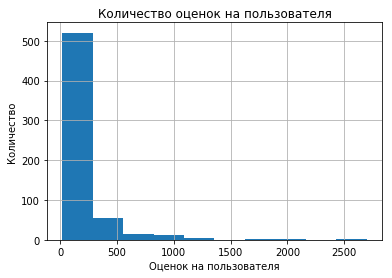

In [28]:
ratings.groupby('userId').size().hist()
plt.title('Количество оценок на пользователя')
plt.xlabel('Оценок на пользователя')
plt.ylabel('Количество');

In [30]:
def plot_simple_hist(data, title, xlabel, ylabel):
    data.hist()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

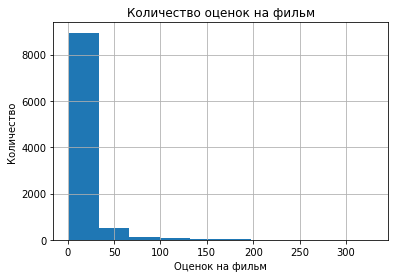

In [31]:
plot_simple_hist(ratings.groupby('movieId').size(), 'Количество оценок на фильм', 'Оценок на фильм', 'Количество')

По графикам видно,что распределение неравномерное, сильно скошено вправо. Видно, что в основном все пользователя ставят фиксированное количество оценок, до примерно 250,  следующая группа по кличеству - это пользователи, поставившие более 250 но менее 500, далее идут более увлекающиеся пользователи. Отдельно выделяется группа фанатиков - поставившая по 2500 оценок. По фильмам похожая ситуация - есть фильмы, видимо популярные, которые получили более 100 оценок, но таких фильмов мало. В основном, все фильмы получают до 25 оценок.

In [43]:
ratings[ratings.movieId.isin(ratings.groupby('movieId').size().sort_values(ascending=False).index.values[:10])].merge(movies, on='movieId').title.unique()

array(['Braveheart (1995)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Pulp Fiction (1994)', 'Forrest Gump (1994)',
       'Jurassic Park (1993)', "Schindler's List (1993)",
       'Silence of the Lambs, The (1991)', 'Matrix, The (1999)',
       'Shawshank Redemption, The (1994)',
       'Terminator 2: Judgment Day (1991)'], dtype=object)

Да, как и подозревалось, фильмы с наибольшим количество оценок - это достаточно известные фильмы.

# 3. Оценить средние оценки по фильмам и по пользователям

# 6. Посмотреть на смещение оценок, увидеть сколько пользователей занижают оценки и завышают оценки.

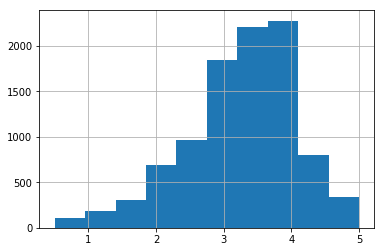

In [45]:
ratings.groupby('movieId')['rating'].mean().hist()

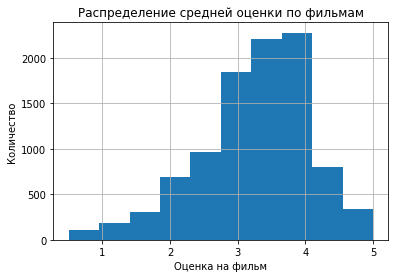

In [52]:
plot_simple_hist(ratings.groupby('movieId')['rating'].mean(), 'Распределение средней оценки по фильмам', 'Оценка на фильм', 'Количество')

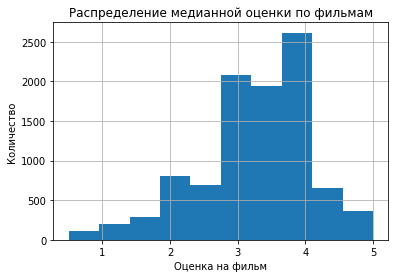

In [51]:
plot_simple_hist(ratings.groupby('movieId')['rating'].median(), 'Распределение медианной оценки по фильмам', 'Оценка на фильм', 'Количество')

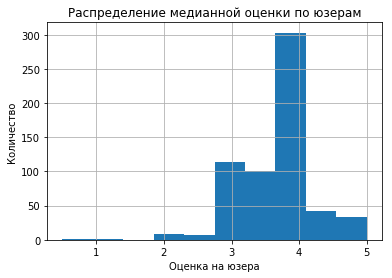

In [50]:
plot_simple_hist(ratings.groupby('userId')['rating'].median(), 'Распределение медианной оценки по юзерам', 'Оценка на юзера', 'Количество')

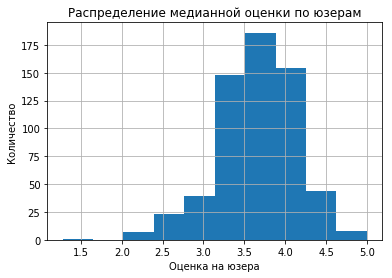

In [53]:
plot_simple_hist(ratings.groupby('userId')['rating'].mean(), 'Распределение медианной оценки по юзерам', 'Оценка на юзера', 'Количество')

Что по фильмам, что по пользователям преобладает положительне значения, что говорит о том, что пользователи оценивают скорее понравившиеся им фильмы и чтоб поставить отрицательную оценку, фильм должен вызвать достаточно сильные негативные эмоции.

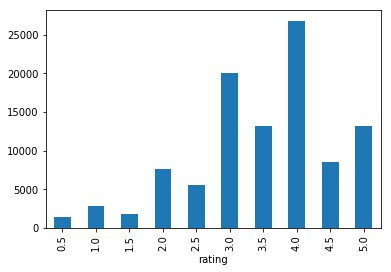

In [84]:
ratings.groupby('rating').size().plot(kind='bar');

Видно, что в основном, все оценивают фильмы нейтрально. Больше положительных оценок. Совсем негативные оценки мало кто ставит.

Посмотрим, сколько человек поставило завышает и занижает оценки

In [101]:
bad_user = ratings.userId.unique()[ratings.groupby('userId')['rating'].mean()< 3]

In [102]:
len(bad_user)

49

In [104]:
good_user = ratings.userId.unique()[ratings.groupby('userId')['rating'].mean()> 4.5]

In [158]:
good_user

array([ 25,  30,  43,  53, 122, 171, 251, 348, 371, 400, 441, 452, 515,
       523])

In [106]:
len(good_user)

14

# 4. Выбрать критерий, показывающий, что фильм нравится всем, или не нравится никому, и вывести топ фильмов из этих списков. Знаете ли вы эти фильмы, согласны ли с оценками?

Критерий


1. Количество оценок сравниваем со средним количеством оценок на фильм и нормируем на разность между максимальным и минимальным значением на фильм. Полученное значение умножаем на среднюю оценку на фильм.


In [287]:
movie_rat = ratings.merge(movies, on='movieId')

In [56]:
movie_rat.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [57]:
movie_rat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
userId       100836 non-null int64
movieId      100836 non-null int64
rating       100836 non-null float64
timestamp    100836 non-null int64
title        100836 non-null object
genres       100836 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


Посчитаем средние оценки по фильмам

In [61]:
title_mean_rating = {}

for title, group in tqdm_notebook(movie_rat.groupby('title')):
    title_mean_rating[title] = group.rating.mean()

Посчитаем количество оценок на фильм

In [62]:
title_num_ratings = {}

for title, group in tqdm_notebook(movie_rat.groupby('title')):
    title_num_ratings[title] = group.userId.unique().shape[0]

Считаем нашу метрику

In [66]:
min_num_ratings = np.min([title_num_ratings[f] for f in title_num_ratings.keys()])
max_num_ratings = np.max([title_num_ratings[f] for f in title_num_ratings.keys()])
mean_num_ratings = np.mean([title_num_ratings[f] for f in title_num_ratings.keys()])

In [67]:
film_with_our_mark = []

for f in title_num_ratings.keys():
    film_with_our_mark.append(
        (f, title_mean_rating[f] * (title_num_ratings[f] - mean_num_ratings) / (max_num_ratings - min_num_ratings))
    )

In [68]:
list(sorted(film_with_our_mark, key=lambda x: x[1], reverse=True))[:20]

[('Shawshank Redemption, The (1994)', 4.140396622352077),
 ('Forrest Gump (1994)', 4.04511657667948),
 ('Pulp Fiction (1994)', 3.795599234431761),
 ('Matrix, The (1999)', 3.4207454409691413),
 ('Silence of the Lambs, The (1991)', 3.4080113927564395),
 ('Star Wars: Episode IV - A New Hope (1977)', 3.103974793934813),
 ('Braveheart (1995)', 2.7855877015865484),
 ('Fight Club (1999)', 2.7047848943888955),
 ("Schindler's List (1993)", 2.7002035552689096),
 ('Jurassic Park (1993)', 2.6024230574258618),
 ('Terminator 2: Judgment Day (1991)', 2.5862869902088406),
 ('Star Wars: Episode V - The Empire Strikes Back (1980)', 2.5785484011187134),
 ('Usual Suspects, The (1995)', 2.5016296926169597),
 ('Toy Story (1995)', 2.4461018531687673),
 ('Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)',
  2.4324644021391335),
 ('American Beauty (1999)', 2.394561678011029),
 ('Godfather, The (1972)', 2.375006509125951),
 ('Lord of the Rings: The Fellowship of the Ring, The (2001

In [71]:
list(sorted(film_with_our_mark, key=lambda x: x[1], reverse=True))[-20:]

[('Watching the Detectives (2007)', -0.14290746814763136),
 ('Watermark (2014)', -0.14290746814763136),
 ('What Happened Was... (1994)', -0.14290746814763136),
 ('What Love Is (2007)', -0.14290746814763136),
 ('What Men Talk About (2010)', -0.14290746814763136),
 ('When Worlds Collide (1951)', -0.14290746814763136),
 ('Who Killed Chea Vichea? (2010)', -0.14290746814763136),
 ('Willy/Milly (1986)', -0.14290746814763136),
 ('Wings, Legs and Tails (1986)', -0.14290746814763136),
 ('Winnie Pooh (1969)', -0.14290746814763136),
 ('Winnie the Pooh Goes Visiting (1971)', -0.14290746814763136),
 ('Winnie the Pooh and the Day of Concern (1972)', -0.14290746814763136),
 ('Winter in Prostokvashino (1984)', -0.14290746814763136),
 ('Woman Is a Woman, A (femme est une femme, Une) (1961)',
  -0.14290746814763136),
 ('Woman Under the Influence, A (1974)', -0.14290746814763136),
 ("Won't You Be My Neighbor? (2018)", -0.14290746814763136),
 ('Wonder Woman (2009)', -0.14290746814763136),
 ('World of Glor

Попробуем добавить количество тэгов

In [72]:
joined_with_tags = movie_rat.join(tags.set_index('movieId'), on='movieId', lsuffix='_left', rsuffix='_right')

In [73]:
title_num_actions = {}

for title, group in tqdm_notebook(joined_with_tags.groupby('title')):
    title_num_actions[title] = group.shape[0]

In [74]:
min_num_actions = np.min([title_num_actions[f] for f in title_num_actions.keys()])
max_num_actions = np.max([title_num_actions[f] for f in title_num_actions.keys()])
mean_num_actions = np.mean([title_num_actions[f] for f in title_num_actions.keys()])

In [75]:
film_with_new_mark = []

for f in title_num_actions.keys():
    film_with_new_mark.append(
        (f, title_mean_rating[f] * (title_num_actions[f] - mean_num_ratings) / (max_num_ratings - min_num_ratings))
    )

In [76]:
list(sorted(film_with_new_mark, key=lambda x: x[1], reverse=True))[:20]

[('Pulp Fiction (1994)', 710.8992577710171),
 ('Fight Club (1999)', 153.2215531870718),
 ('Star Wars: Episode IV - A New Hope (1977)', 84.04909674515433),
 ('Léon: The Professional (a.k.a. The Professional) (Léon) (1994)',
  56.907945325115676),
 ('Eternal Sunshine of the Spotless Mind (2004)', 56.36231084059733),
 ('2001: A Space Odyssey (1968)', 52.93931604254306),
 ('Inception (2010)', 45.965889786735744),
 ('Big Lebowski, The (1998)', 40.46123194768863),
 ('Donnie Darko (2001)', 38.24601049504502),
 ('Forrest Gump (1994)', 37.459750723020946),
 ('Braveheart (1995)', 29.003575506464596),
 ('Star Wars: Episode V - The Empire Strikes Back (1980)', 26.985560596240664),
 ('Memento (2000)', 25.84978264579838),
 ('Lord of the Rings: The Return of the King, The (2003)', 23.101424782600702),
 ('Terminator 2: Judgment Day (1991)', 21.569518697525915),
 ('Twelve Monkeys (a.k.a. 12 Monkeys) (1995)', 21.367917448896037),
 ('Silence of the Lambs, The (1991)', 21.106182124463757),
 ('Raiders of t

Любопытно, что  с добавлением тэгов некоторые фильмы вообще пропали из топ 20, например, Побег из Шоушенка раньше был на первом месте, а теперь вообще пропал. 

In [77]:
list(sorted(film_with_new_mark, key=lambda x: x[1], reverse=True))[-20:]

[('Vovka in the Kingdom of Far Far Away (1965)', -0.14290746814763136),
 ('Watching the Detectives (2007)', -0.14290746814763136),
 ('Watermark (2014)', -0.14290746814763136),
 ('What Happened Was... (1994)', -0.14290746814763136),
 ('What Love Is (2007)', -0.14290746814763136),
 ('What Men Talk About (2010)', -0.14290746814763136),
 ('When Worlds Collide (1951)', -0.14290746814763136),
 ('Willy/Milly (1986)', -0.14290746814763136),
 ('Wings, Legs and Tails (1986)', -0.14290746814763136),
 ('Winnie Pooh (1969)', -0.14290746814763136),
 ('Winnie the Pooh Goes Visiting (1971)', -0.14290746814763136),
 ('Winnie the Pooh and the Day of Concern (1972)', -0.14290746814763136),
 ('Winter in Prostokvashino (1984)', -0.14290746814763136),
 ('Woman Is a Woman, A (femme est une femme, Une) (1961)',
  -0.14290746814763136),
 ('Woman Under the Influence, A (1974)', -0.14290746814763136),
 ("Won't You Be My Neighbor? (2018)", -0.14290746814763136),
 ('Wonder Woman (2009)', -0.14290746814763136),
 ('

Но в целом, обе метрики, достаточно неплохо отражают действительность.

# 5. Выбрать лучшие фильмы

Для лучших фильмов буду использовать первую метрику

In [79]:
top_films = [x[0] for x in list(sorted(film_with_our_mark, key=lambda x: x[1], reverse=True))[:20]]

In [80]:
top_films

['Shawshank Redemption, The (1994)',
 'Forrest Gump (1994)',
 'Pulp Fiction (1994)',
 'Matrix, The (1999)',
 'Silence of the Lambs, The (1991)',
 'Star Wars: Episode IV - A New Hope (1977)',
 'Braveheart (1995)',
 'Fight Club (1999)',
 "Schindler's List (1993)",
 'Jurassic Park (1993)',
 'Terminator 2: Judgment Day (1991)',
 'Star Wars: Episode V - The Empire Strikes Back (1980)',
 'Usual Suspects, The (1995)',
 'Toy Story (1995)',
 'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)',
 'American Beauty (1999)',
 'Godfather, The (1972)',
 'Lord of the Rings: The Fellowship of the Ring, The (2001)',
 'Star Wars: Episode VI - Return of the Jedi (1983)',
 'Seven (a.k.a. Se7en) (1995)']

# 7. Построить рекомендательную систему с помощью библиотеки surprise (или другой, по желанию). Применить подбор параметров модели на сетке, оценить качество полученной модели по выбранной вами метрике. 

In [112]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV

In [116]:
movie_rat.dropna(inplace=True)

In [109]:
dataset = pd.DataFrame({
    'uid': movie_rat.userId,
    'iid': movie_rat.title,
    'rating': movie_rat.rating
})

In [110]:
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(dataset, reader)

In [117]:
param_grid = {'n_epochs': [ 20,23], 'lr_all': [ 0.01,0.015,0.02],
              'reg_all': [  0.1, 0.15, 0.2]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.8610724575335884
{'n_epochs': 23, 'lr_all': 0.02, 'reg_all': 0.1}


In [118]:
svd = SVD(**gs.best_params['rmse'])

In [168]:
svd

In [119]:
trainset, testset = train_test_split(data, test_size=.15, random_state=42)

In [120]:
svd.train(trainset)

/home/truv/anaconda3/lib/python3.7/site-packages/surprise/prediction_algorithms/algo_base.py:51: UserWarning: train() is deprecated. Use fit() instead
  warnings.warn('train() is deprecated. Use fit() instead', UserWarning)


In [121]:
from surprise.accuracy import mae, rmse

In [123]:
pred = svd.test(testset)
mae(pred), rmse(pred)

MAE:  0.6491
RMSE: 0.8482


(0.6490888538592636, 0.8482014928851531)

# 8. Получить рекомендации для нового пользователя, совпадают ли они с лучшими фильмами?

Добавим нового пользователя с хорошими оценками для лучших фильмов

In [129]:
max(movie_rat.userId)

610

In [172]:
new_users

,userId,movieId,rating
0,611,356,5.0
1,611,1196,4.5
2,611,8371,4.5
3,611,181463,5.0


In [171]:
new_users = pd.DataFrame({'userId':[611,611,611,611], 'movieId':[356,1196,8371],'rating':[5,4.5,4.5]} )

In [173]:
new_rat = new_users.merge(movies, on='movieId')

In [174]:
new_rat

,userId,movieId,rating,title,genres
0,611,356,5.0,Forrest Gump (1994),Comedy|Drama|Romance|War
1,611,1196,4.5,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi
2,611,8371,4.5,"Chronicles of Riddick, The (2004)",Action|Sci-Fi|Thriller


In [175]:
movie_rat = movie_rat.append(new_rat, ignore_index=True)

Выберем один из топ фильмов и посмотрим прдсказания алгоритма для пользователей с хорошими средним оценками

In [204]:
for user in good_user:
    print(svd.predict(user, 356))

user: 25         item: 356        r_ui = None   est = 4.26   {'was_impossible': False}
user: 30         item: 356        r_ui = None   est = 4.19   {'was_impossible': False}
user: 43         item: 356        r_ui = None   est = 4.46   {'was_impossible': False}
user: 53         item: 356        r_ui = None   est = 4.74   {'was_impossible': False}
user: 122        item: 356        r_ui = None   est = 4.26   {'was_impossible': False}
user: 171        item: 356        r_ui = None   est = 4.33   {'was_impossible': False}
user: 251        item: 356        r_ui = None   est = 4.14   {'was_impossible': False}
user: 348        item: 356        r_ui = None   est = 4.24   {'was_impossible': False}
user: 371        item: 356        r_ui = None   est = 4.28   {'was_impossible': False}
user: 400        item: 356        r_ui = None   est = 3.93   {'was_impossible': False}
user: 441        item: 356        r_ui = None   est = 4.29   {'was_impossible': False}
user: 452        item: 356        r_ui = No

С плохими средними оценками

In [206]:
for user in bad_user:
    print(svd.predict(user, 356))

user: 3          item: 356        r_ui = None   est = 2.43   {'was_impossible': False}
user: 19         item: 356        r_ui = None   est = 2.90   {'was_impossible': False}
user: 22         item: 356        r_ui = None   est = 2.71   {'was_impossible': False}
user: 36         item: 356        r_ui = None   est = 2.74   {'was_impossible': False}
user: 50         item: 356        r_ui = None   est = 2.70   {'was_impossible': False}
user: 55         item: 356        r_ui = None   est = 2.96   {'was_impossible': False}
user: 81         item: 356        r_ui = None   est = 2.80   {'was_impossible': False}
user: 139        item: 356        r_ui = None   est = 2.32   {'was_impossible': False}
user: 149        item: 356        r_ui = None   est = 3.14   {'was_impossible': False}
user: 153        item: 356        r_ui = None   est = 2.20   {'was_impossible': False}
user: 160        item: 356        r_ui = None   est = 2.85   {'was_impossible': False}
user: 181        item: 356        r_ui = No

Предсказания,в целом, соответствует поведению пользователей. Пользователь с низкой средней оценкой оценился с более низкими оценками, чем с пользователь с высокими оценками. Проверим на новом пользователе.

In [176]:
dataset = pd.DataFrame({
    'uid': movie_rat.userId,
    'iid': movie_rat.title,
    'rating': movie_rat.rating
})

In [177]:
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(dataset, reader)

In [178]:
trainset, testset = train_test_split(data, test_size=.15, random_state=42)

In [179]:
svd.train(trainset)

In [186]:
vec = []
for movieId in movies.movieId.unique():
    if movieId in [356,1196,8371]:
        continue
    vec.append((611,movieId,svd.default_prediction()))
pred_for_new_vec = svd.test(vec)    

In [190]:
movies_for_new_vec = []
for uid, iid, true_r, est, _ in pred_for_new_vec:
    movies_for_new_vec.append((iid, est))
                              
movies_for_new_vec = sorted(movies_for_new_vec,reverse=True)[:20]
movies_for_new_vec

[(193609, 4.023756980679436),
 (193587, 4.023756980679436),
 (193585, 4.023756980679436),
 (193583, 4.023756980679436),
 (193581, 4.023756980679436),
 (193579, 4.023756980679436),
 (193573, 4.023756980679436),
 (193571, 4.023756980679436),
 (193567, 4.023756980679436),
 (193565, 4.023756980679436),
 (191005, 4.023756980679436),
 (190221, 4.023756980679436),
 (190219, 4.023756980679436),
 (190215, 4.023756980679436),
 (190213, 4.023756980679436),
 (190209, 4.023756980679436),
 (190207, 4.023756980679436),
 (190183, 4.023756980679436),
 (189713, 4.023756980679436),
 (189547, 4.023756980679436)]

In [196]:
movies_dict = movies.set_index('movieId')[['title', 'genres']].to_dict()

In [203]:
for t in movies_for_new_vec:
    print(movies_dict['title'][t[0]], t[1], movies_dict['genres'][t[0]])

Andrew Dice Clay: Dice Rules (1991) 4.023756980679436 Comedy
Bungo Stray Dogs: Dead Apple (2018) 4.023756980679436 Action|Animation
Flint (2017) 4.023756980679436 Drama
No Game No Life: Zero (2017) 4.023756980679436 Animation|Comedy|Fantasy
Black Butler: Book of the Atlantic (2017) 4.023756980679436 Action|Animation|Comedy|Fantasy
Jon Stewart Has Left the Building (2015) 4.023756980679436 Documentary
Love Live! The School Idol Movie (2015) 4.023756980679436 Animation
Silver Spoon (2014) 4.023756980679436 Comedy|Drama
anohana: The Flower We Saw That Day - The Movie (2013) 4.023756980679436 Animation|Drama
Gintama: The Movie (2010) 4.023756980679436 Action|Animation|Comedy|Sci-Fi
Gintama (2017) 4.023756980679436 Action|Adventure|Comedy|Sci-Fi
Hommage à Zgougou (et salut à Sabine Mamou) (2002) 4.023756980679436 Documentary
Bunny (1998) 4.023756980679436 Animation
Liquid Truth (2017) 4.023756980679436 Drama
John From (2015) 4.023756980679436 Drama
Jeff Ross Roasts the Border (2017) 4.02375

Мы задали пользователи оценки на известные фильмы из топ-20. Однако, в рекомендованных пользователю таких фильмов не было.Если мы взглянем на детали предсказания, то можно сказать, что алгоритм завышал оценки для пользователся.

In [207]:
pred_for_new_vec

[Prediction(uid=611, iid=1, r_ui=3.501143337144457, est=4.023756980679436, details={'was_impossible': False}),
 Prediction(uid=611, iid=2, r_ui=3.501143337144457, est=4.023756980679436, details={'was_impossible': False}),
 Prediction(uid=611, iid=3, r_ui=3.501143337144457, est=4.023756980679436, details={'was_impossible': False}),
 Prediction(uid=611, iid=4, r_ui=3.501143337144457, est=4.023756980679436, details={'was_impossible': False}),
 Prediction(uid=611, iid=5, r_ui=3.501143337144457, est=4.023756980679436, details={'was_impossible': False}),
 Prediction(uid=611, iid=6, r_ui=3.501143337144457, est=4.023756980679436, details={'was_impossible': False}),
 Prediction(uid=611, iid=7, r_ui=3.501143337144457, est=4.023756980679436, details={'was_impossible': False}),
 Prediction(uid=611, iid=8, r_ui=3.501143337144457, est=4.023756980679436, details={'was_impossible': False}),
 Prediction(uid=611, iid=9, r_ui=3.501143337144457, est=4.023756980679436, details={'was_impossible': False}),
 

In [210]:
ratings[ratings.movieId == 1196].mean()

userId       2.983697e+02
movieId      1.196000e+03
rating       4.215640e+00
timestamp    1.197440e+09
dtype: float64

In [224]:
def add_new_user(userId, movieId, rating,df):
    new_users = pd.DataFrame({'userId':userId, 'movieId':movieId,'rating':rating} )
    new_rat = new_users.merge(movies, on='movieId')
    df = df.append(new_rat, ignore_index=True)
    return df

In [289]:
def predict_new_user(gs,new_users_id,df,n=20):
    
    dataset = pd.DataFrame({
    'uid': df.userId,
    'iid': df.title,
    'rating': df.rating
    })
    
    reader = Reader(rating_scale=(0.5, 5.0))
    data = Dataset.load_from_df(dataset, reader)
    
    new_model = SVD(**gs.best_params['rmse'])
    trainset = data.build_full_trainset()
    new_model.fit(trainset)
    
    movies_user =df[df.userId == new_users_id].movieId.unique()
    
    vec = []
    for movieId in df.movieId.unique():
        if movieId in movies_user:
            continue
        vec.append((new_users_id,movieId,new_model.default_prediction()))
    pred_for_new_vec = new_model.test(vec)    
    
    movies_for_new_vec = []
    for uid, iid, true_r, est, _ in pred_for_new_vec:
        movies_for_new_vec.append((iid, est))

    movies_for_new_vec = sorted(movies_for_new_vec,reverse=True)[:n]
    
    for t in movies_for_new_vec:
        print(movies_dict['title'][t[0]], t[1], movies_dict['genres'][t[0]])

# 9. Поставьте оценку какому-нибудь фильму (который вы знаете и можете поставить оценку) и получите рекомендации, насколько они качественные по вашим ощущениям? Сделайте это для фильма с негативной оценкой и для фильма с позитивной оценкой.
10. Добавляйте оценки и посмотрите, как изменяются рекомендации фильмов. Соответствуют ли они вашим предпочтениям? Есть ли недостатки у системы? 

In [214]:
top_films

['Shawshank Redemption, The (1994)',
 'Forrest Gump (1994)',
 'Pulp Fiction (1994)',
 'Matrix, The (1999)',
 'Silence of the Lambs, The (1991)',
 'Star Wars: Episode IV - A New Hope (1977)',
 'Braveheart (1995)',
 'Fight Club (1999)',
 "Schindler's List (1993)",
 'Jurassic Park (1993)',
 'Terminator 2: Judgment Day (1991)',
 'Star Wars: Episode V - The Empire Strikes Back (1980)',
 'Usual Suspects, The (1995)',
 'Toy Story (1995)',
 'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)',
 'American Beauty (1999)',
 'Godfather, The (1972)',
 'Lord of the Rings: The Fellowship of the Ring, The (2001)',
 'Star Wars: Episode VI - Return of the Jedi (1983)',
 'Seven (a.k.a. Se7en) (1995)']

In [222]:
for movie in top_films:
    print(movie, movies.loc[movies['title'] == movie,'movieId'].values[0])

Shawshank Redemption, The (1994) 318
Forrest Gump (1994) 356
Pulp Fiction (1994) 296
Matrix, The (1999) 2571
Silence of the Lambs, The (1991) 593
Star Wars: Episode IV - A New Hope (1977) 260
Braveheart (1995) 110
Fight Club (1999) 2959
Schindler's List (1993) 527
Jurassic Park (1993) 480
Terminator 2: Judgment Day (1991) 589
Star Wars: Episode V - The Empire Strikes Back (1980) 1196
Usual Suspects, The (1995) 50
Toy Story (1995) 1
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981) 1198
American Beauty (1999) 2858
Godfather, The (1972) 858
Lord of the Rings: The Fellowship of the Ring, The (2001) 4993
Star Wars: Episode VI - Return of the Jedi (1983) 1210
Seven (a.k.a. Se7en) (1995) 47


In [228]:
movie_rat = add_new_user([612,612,612,612,612,612,612], [318,2571,593,2959,480,1,47], [4,4.5,5,5,4.3,4.7,4],movie_rat)

In [230]:
movie_rat[movie_rat['userId'] == 612]

,genres,movieId,rating,timestamp,title,userId
100836,Crime|Drama,318,4.0,NaN,"Shawshank Redemption, The (1994)",612
100837,Action|Sci-Fi|Thriller,2571,4.5,NaN,"Matrix, The (1999)",612
100838,Crime|Horror|Thriller,593,5.0,NaN,"Silence of the Lambs, The (1991)",612
100839,Action|Crime|Drama|Thriller,2959,5.0,NaN,Fight Club (1999),612
100840,Action|Adventure|Sci-Fi|Thriller,480,4.3,NaN,Jurassic Park (1993),612
100841,Adventure|Animation|Children|Comedy|Fantasy,1,4.7,NaN,Toy Story (1995),612
100842,Mystery|Thriller,47,4.0,NaN,Seven (a.k.a. Se7en) (1995),612


In [290]:
predict_new_user(gs,612,movie_rat,n=20)

Andrew Dice Clay: Dice Rules (1991) 3.501556983616962 Comedy
Bungo Stray Dogs: Dead Apple (2018) 3.501556983616962 Action|Animation
Flint (2017) 3.501556983616962 Drama
No Game No Life: Zero (2017) 3.501556983616962 Animation|Comedy|Fantasy
Black Butler: Book of the Atlantic (2017) 3.501556983616962 Action|Animation|Comedy|Fantasy
Jon Stewart Has Left the Building (2015) 3.501556983616962 Documentary
Love Live! The School Idol Movie (2015) 3.501556983616962 Animation
Silver Spoon (2014) 3.501556983616962 Comedy|Drama
anohana: The Flower We Saw That Day - The Movie (2013) 3.501556983616962 Animation|Drama
Gintama: The Movie (2010) 3.501556983616962 Action|Animation|Comedy|Sci-Fi
Gintama (2017) 3.501556983616962 Action|Adventure|Comedy|Sci-Fi
Hommage à Zgougou (et salut à Sabine Mamou) (2002) 3.501556983616962 Documentary
Bunny (1998) 3.501556983616962 Animation
Liquid Truth (2017) 3.501556983616962 Drama
John From (2015) 3.501556983616962 Drama
Jeff Ross Roasts the Border (2017) 3.50155

При увеличении оценок для юзера, рекомендации стали больше походить на правду. Жанры рекомендуют достаточно релевантные для пользователя. Попробуем добавить оценок для плохих фильмов

In [232]:
bottom_films = [x[0] for x in list(sorted(film_with_our_mark, key=lambda x: x[1]))[:20]]

In [233]:
bottom_films

["'Salem's Lot (2004)",
 '12 Angry Men (1997)',
 '12 Chairs (1976)',
 '20 Million Miles to Earth (1957)',
 '61* (2001)',
 '7 Faces of Dr. Lao (1964)',
 '9/11 (2002)',
 'A Detective Story (2003)',
 'A Flintstones Christmas Carol (1994)',
 'A Perfect Day (2015)',
 'A Plasticine Crow (1981)',
 'Act of Killing, The (2012)',
 'Adventures Of Sherlock Holmes And Dr. Watson: The Twentieth Century Approaches (1986)',
 'Advise and Consent (1962)',
 'Alesha Popovich and Tugarin the Dragon (2004)',
 'Alien Contamination (1980)',
 'All Yours (2016)',
 'All the Vermeers in New York (1990)',
 'American Friend, The (Amerikanische Freund, Der) (1977)',
 'Animals are Beautiful People (1974)']

In [234]:
for movie in bottom_films:
    print(movie, movies.loc[movies['title'] == movie,'movieId'].values[0])

'Salem's Lot (2004) 27751
12 Angry Men (1997) 77846
12 Chairs (1976) 141816
20 Million Miles to Earth (1957) 5468
61* (2001) 27373
7 Faces of Dr. Lao (1964) 42556
9/11 (2002) 44943
A Detective Story (2003) 172875
A Flintstones Christmas Carol (1994) 126088
A Perfect Day (2015) 147410
A Plasticine Crow (1981) 170597
Act of Killing, The (2012) 100556
Adventures Of Sherlock Holmes And Dr. Watson: The Twentieth Century Approaches (1986) 147300
Advise and Consent (1962) 26078
Alesha Popovich and Tugarin the Dragon (2004) 165959
Alien Contamination (1980) 6835
All Yours (2016) 158882
All the Vermeers in New York (1990) 3531
American Friend, The (Amerikanische Freund, Der) (1977) 6021
Animals are Beautiful People (1974) 6408


In [235]:
movie_rat = add_new_user([612,612,612,612,612,612,612], [27751,77846,141816,5468,27373,172875,126088], [3,2.1,2,1,3.3,3.7,4],movie_rat)

In [236]:
movie_rat[movie_rat['userId'] == 612]

,genres,movieId,rating,timestamp,title,userId
100836,Crime|Drama,318,4.0,NaN,"Shawshank Redemption, The (1994)",612
100837,Action|Sci-Fi|Thriller,2571,4.5,NaN,"Matrix, The (1999)",612
100838,Crime|Horror|Thriller,593,5.0,NaN,"Silence of the Lambs, The (1991)",612
100839,Action|Crime|Drama|Thriller,2959,5.0,NaN,Fight Club (1999),612
100840,Action|Adventure|Sci-Fi|Thriller,480,4.3,NaN,Jurassic Park (1993),612
100841,Adventure|Animation|Children|Comedy|Fantasy,1,4.7,NaN,Toy Story (1995),612
100842,Mystery|Thriller,47,4.0,NaN,Seven (a.k.a. Se7en) (1995),612
100843,Drama|Horror|Mystery|Thriller,27751,3.0,NaN,'Salem's Lot (2004),612
100844,Crime|Drama,77846,2.1,NaN,12 Angry Men (1997),612
100845,Adventure|Comedy,141816,2.0,NaN,12 Chairs (1976),612


In [237]:
predict_new_user(gs,612,movie_rat,n=20)

Andrew Dice Clay: Dice Rules (1991) 3.3497029959213624 Comedy
Bungo Stray Dogs: Dead Apple (2018) 3.3497029959213624 Action|Animation
Flint (2017) 3.3497029959213624 Drama
No Game No Life: Zero (2017) 3.3497029959213624 Animation|Comedy|Fantasy
Black Butler: Book of the Atlantic (2017) 3.3497029959213624 Action|Animation|Comedy|Fantasy
Jon Stewart Has Left the Building (2015) 3.3497029959213624 Documentary
Love Live! The School Idol Movie (2015) 3.3497029959213624 Animation
Silver Spoon (2014) 3.3497029959213624 Comedy|Drama
anohana: The Flower We Saw That Day - The Movie (2013) 3.3497029959213624 Animation|Drama
Gintama: The Movie (2010) 3.3497029959213624 Action|Animation|Comedy|Sci-Fi
Gintama (2017) 3.3497029959213624 Action|Adventure|Comedy|Sci-Fi
Hommage à Zgougou (et salut à Sabine Mamou) (2002) 3.3497029959213624 Documentary
Bunny (1998) 3.3497029959213624 Animation
Liquid Truth (2017) 3.3497029959213624 Drama
John From (2015) 3.3497029959213624 Drama
Jeff Ross Roasts the Border

Оценки у предложенных фильмов упали, на это повлияло то, что мы добавили данные к пользователю с низкими оценками. Жанры все также остаются достаточно релевантными. Однако сами фильмы скорее всего будут не очень релевантны пользователю. Ни одного топ фильма в списке нет. Система достаточно неплохо реагирует на общий настрой пользователя (позитивные/негативные оценки в целом),  неплохо отбирает жанры, но сами фильмы рекомендует достаточно плохо.

In [238]:
middle_films = [x[0] for x in list(sorted(film_with_our_mark, key=lambda x: x[1], reverse=True))[20:40]]

In [239]:
middle_films

['Saving Private Ryan (1998)',
 'Apollo 13 (1995)',
 'Lord of the Rings: The Return of the King, The (2003)',
 'Fugitive, The (1993)',
 'Lord of the Rings: The Two Towers, The (2002)',
 'Fargo (1996)',
 'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)',
 'Independence Day (a.k.a. ID4) (1996)',
 'Sixth Sense, The (1999)',
 'Aladdin (1992)',
 'Back to the Future (1985)',
 'Lion King, The (1994)',
 'Gladiator (2000)',
 'Shrek (2001)',
 'Memento (2000)',
 'Batman (1989)',
 'Dances with Wolves (1990)',
 'Dark Knight, The (2008)',
 'True Lies (1994)',
 'Speed (1994)']

In [240]:
for movie in middle_films:
    print(movie, movies.loc[movies['title'] == movie,'movieId'].values[0])

Saving Private Ryan (1998) 2028
Apollo 13 (1995) 150
Lord of the Rings: The Return of the King, The (2003) 7153
Fugitive, The (1993) 457
Lord of the Rings: The Two Towers, The (2002) 5952
Fargo (1996) 608
Twelve Monkeys (a.k.a. 12 Monkeys) (1995) 32
Independence Day (a.k.a. ID4) (1996) 780
Sixth Sense, The (1999) 2762
Aladdin (1992) 588
Back to the Future (1985) 1270
Lion King, The (1994) 364
Gladiator (2000) 3578
Shrek (2001) 4306
Memento (2000) 4226
Batman (1989) 592
Dances with Wolves (1990) 590
Dark Knight, The (2008) 58559
True Lies (1994) 380
Speed (1994) 377


In [241]:
movie_rat = add_new_user([612,612,612,612,612,612,612], [2028,150,7153,457,5952,608,32], [4,4,4,4.5,4.5,5,4.3],movie_rat)

In [242]:
predict_new_user(gs,612,movie_rat,n=20)

Andrew Dice Clay: Dice Rules (1991) 3.5417675552068757 Comedy
Bungo Stray Dogs: Dead Apple (2018) 3.5417675552068757 Action|Animation
Flint (2017) 3.5417675552068757 Drama
No Game No Life: Zero (2017) 3.5417675552068757 Animation|Comedy|Fantasy
Black Butler: Book of the Atlantic (2017) 3.5417675552068757 Action|Animation|Comedy|Fantasy
Jon Stewart Has Left the Building (2015) 3.5417675552068757 Documentary
Love Live! The School Idol Movie (2015) 3.5417675552068757 Animation
Silver Spoon (2014) 3.5417675552068757 Comedy|Drama
anohana: The Flower We Saw That Day - The Movie (2013) 3.5417675552068757 Animation|Drama
Gintama: The Movie (2010) 3.5417675552068757 Action|Animation|Comedy|Sci-Fi
Gintama (2017) 3.5417675552068757 Action|Adventure|Comedy|Sci-Fi
Hommage à Zgougou (et salut à Sabine Mamou) (2002) 3.5417675552068757 Documentary
Bunny (1998) 3.5417675552068757 Animation
Liquid Truth (2017) 3.5417675552068757 Drama
John From (2015) 3.5417675552068757 Drama
Jeff Ross Roasts the Border

При добавлении новых оценок , рекомендации повысились, но все также упорно нет ни одного известного фильма в рекомендациях.

# 11. Построить рекомендательную систему по подвыборке - выбрать интересный вам жанр. Изменились ли рекомендации? Стали лучше\хуже?

In [291]:
movie_rat_new = movie_rat[movie_rat['genres'].str.contains('Action')]

In [293]:
predict_new_user(gs,612,movie_rat_new,n=20)

Bungo Stray Dogs: Dead Apple (2018) 3.447984331646809 Action|Animation
Black Butler: Book of the Atlantic (2017) 3.447984331646809 Action|Animation|Comedy|Fantasy
Gintama: The Movie (2010) 3.447984331646809 Action|Animation|Comedy|Sci-Fi
Gintama (2017) 3.447984331646809 Action|Adventure|Comedy|Sci-Fi
Iron Soldier (2010) 3.447984331646809 Action|Sci-Fi
SuperFly (2018) 3.447984331646809 Action|Crime|Thriller
Mission: Impossible - Fallout (2018) 3.447984331646809 Action|Adventure|Thriller
Ant-Man and the Wasp (2018) 3.447984331646809 Action|Adventure|Comedy|Fantasy|Sci-Fi
Solo: A Star Wars Story (2018) 3.447984331646809 Action|Adventure|Children|Sci-Fi
Deadpool 2 (2018) 3.447984331646809 Action|Comedy|Sci-Fi
Incredibles 2 (2018) 3.447984331646809 Action|Adventure|Animation|Children
Jurassic World: Fallen Kingdom (2018) 3.447984331646809 Action|Adventure|Drama|Sci-Fi|Thriller
Rampage (2018) 3.447984331646809 Action|Adventure|Sci-Fi
Pacific Rim: Uprising (2018) 3.447984331646809 Action|Fant

Рекомендации стали лучше - появились известные фильмы в выборке.